In [22]:
conda install -c conda-forge prophet

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
- DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-64/cu

 ... (more hidden) ...DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/importlib_resources-6.0.1-pyhd8ed1ab_0.conda HTTP/1.1" 200 30639




importlib_resources- | 30 KB     | ###################7                  |  53% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/holidays-0.32-pyhd8ed1ab_0.conda HTTP/1.1" 200 282938



holidays-0.32        | 276 KB    | ##1                                   |   6% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/convertdate-2.4.0-pyhd8ed1ab_0.tar.bz2 HTTP/1.1" 200 38900


convertdate-2.4.0    | 38 KB     | ###############5                      |  42% DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/lunarcalendar-0.0.9-py_0.tar.bz2 HTTP/1.1" 200 20021





lunarcalendar-0.0.9  | 20 KB     | ##############################2 

compiler-rt_osx-64-1 | 3.4 MB    | #####6                                |  15% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/certifi-2023.7.22-pyhd8ed1ab_0.conda HTTP/1.1" 200 153791
















llvm-tools-14.0.6    | 11.8 MB   | ###############                       |  41% 













compiler-rt_osx-64-1 | 3.4 MB    | ##########5                           |  28% 










llvm-tools-14.0.6    | 11.8 MB   | #################3                    |  47% 













compiler-rt_osx-64-1 | 3.4 MB    | ##############5                       |  39% 










DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-64/cmdstan-2.31.0-h33b0451_0.conda HTTP/1.1" 200 45747355
libclang-cpp14-14.0. | 14.2 MB   | ########9                             |  24% 














llvm-tools-14.0.6    | 11.8 MB   | ###################4                  |  53% 













compiler-rt_osx-64-1 | 3.4 MB    | #####################2        

cmdstanpy-1.1.0      | 64 KB     | #########2                            |  25% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-64/make-4.3-h22f3db7_1.tar.bz2 HTTP/1.1" 200 255465























 ... (more hidden) ...DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-64/clangxx_osx-64-14.0.6-h6f97653_6.conda HTTP/1.1" 200 19289






















cmdstanpy-1.1.0      | 64 KB     | ##################################### | 100% 










libclang-cpp14-14.0. | 14.2 MB   | ##########################8           |  73% 














cmdstan-2.31.0       | 43.6 MB   | ###########4                          |  31% 
















ephem-4.1.4          | 1.3 MB    | ##################################### | 100% 
















ephem-4.1.4          | 1.3 MB    | ##################################### | 100% 










libclang-cpp14-14.0. | 14.2 MB   | #############################5        |  80% 














cmdstan-2

In [23]:
import pandas as pd
from prophet import Prophet

In [46]:
df = pd.read_csv('unit8.csv')
df

,ds,y
0,11/22/11 0:00,42916.958
1,11/23/11 0:00,42917.000
2,11/24/11 0:00,42917.041
3,11/25/11 0:00,42917.083
4,11/26/11 0:00,42917.125
...,...,...
740,12/1/13 0:00,42947.833
741,12/2/13 0:00,42947.875
742,12/3/13 0:00,42947.916
743,12/4/13 0:00,42947.958


In [47]:
m = Prophet()
m.fit(df)

13:21:36 - cmdstanpy - INFO - Chain [1] start processing
13:21:37 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1105,2014-12-01
1106,2014-12-02
1107,2014-12-03
1108,2014-12-04
1109,2014-12-05


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1105,2014-12-01,42962.633768,42962.149678,42963.119259
1106,2014-12-02,42962.674746,42962.188639,42963.162050
1107,2014-12-03,42962.715599,42962.228554,42963.210040
1108,2014-12-04,42962.756451,42962.267648,42963.249642
1109,2014-12-05,42962.797637,42962.305349,42963.292556


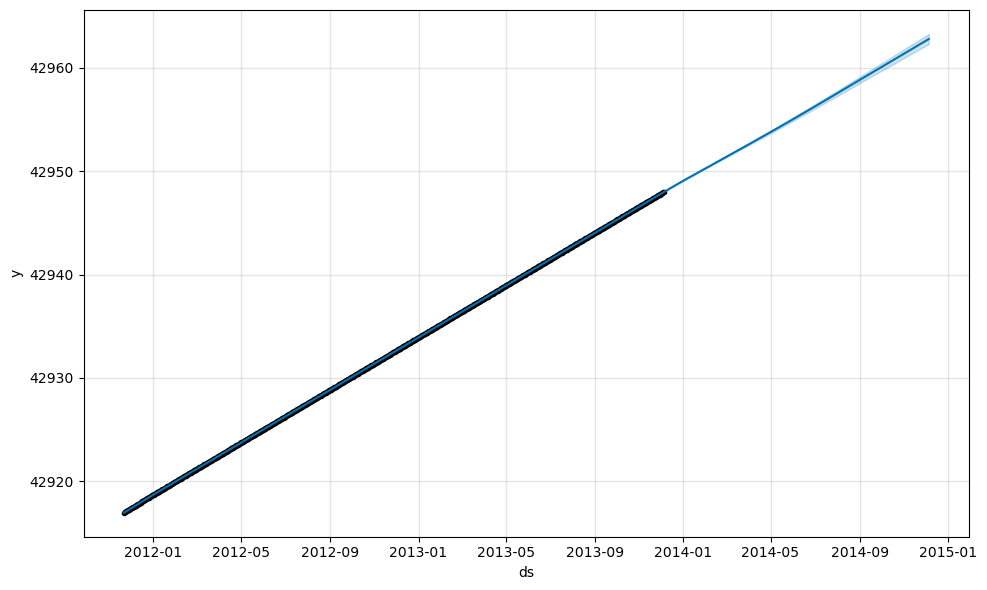

In [50]:
fig1 = m.plot(forecast)

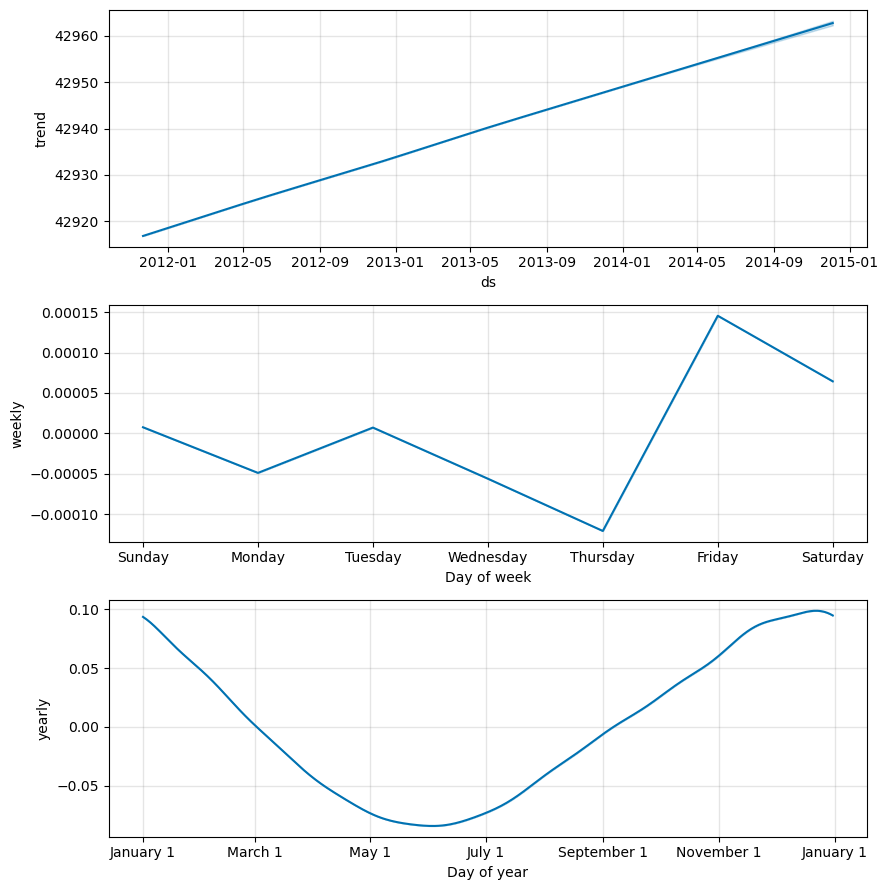

In [51]:
fig2 = m.plot_components(forecast)